In [1]:
import numpy as np

In [7]:
def sim_N_own_procedure(lam):
    k = 0
    Tk = 0.0
    while Tk <= 1.0:
        u = np.random.uniform(0, 1)
        # use inverse transform of exponential distribution
        Tk += -np.log(u) / lam
        k += 1
    return k - 1 # bc we run over the one in the last step

def sim_N_recursive_inverse_transform(lam):
    k = 0
    Pk = np.exp(-lam)
    F = Pk
    u = np.random.uniform(0, 1)
    if u <= F:
        return k
    while F < u:
        Pk = Pk * lam / (k + 1)
        F += Pk
        k += 1
    return k

Own procedure time: 0.12438011169433594 seconds


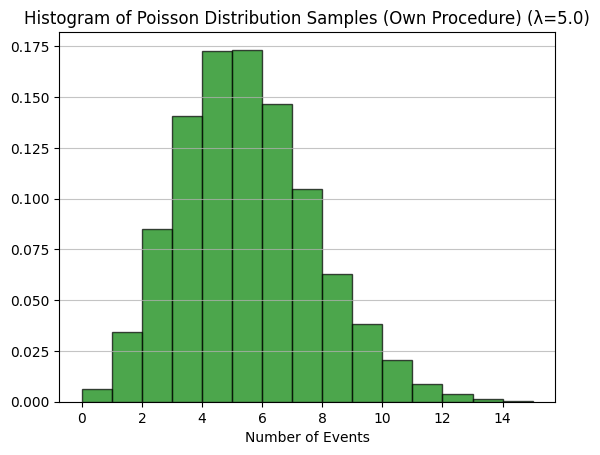

Recursive procedure time: 0.04058241844177246 seconds


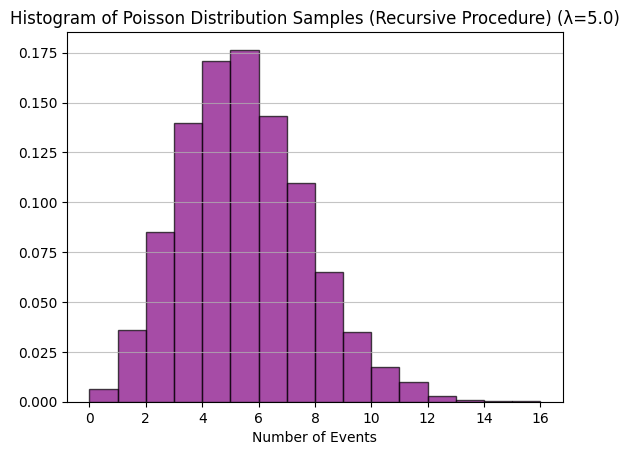

In [8]:
# benchmark the runtime of both functions by simulating 10 000 samples each 
import time
import matplotlib.pyplot as plt

sample_size = 10000
lam = 5.0
start_time = time.time()
samples_own = [sim_N_own_procedure(lam) for _ in range(sample_size)]
end_time = time.time()
print(f"Own procedure time: {end_time - start_time} seconds")   
# plot histogram of samples
plt.hist(samples_own, bins=range(max(samples_own) + 2), density=True, alpha=0.7, color='green', edgecolor='black')
plt.title(f'Histogram of Poisson Distribution Samples (Own Procedure) (λ={lam})')
plt.xlabel('Number of Events')
plt.grid(axis='y', alpha=0.75)
plt.show()


start_time = time.time()
samples_recursive = [sim_N_recursive_inverse_transform(lam) for _ in range(sample_size)]
end_time = time.time()
print(f"Recursive procedure time: {end_time - start_time} seconds")
# plot histogram of samples
plt.hist(samples_recursive, bins=range(max(samples_recursive) + 2), density=True, alpha=0.7, color='purple', edgecolor='black')
plt.title(f'Histogram of Poisson Distribution Samples (Recursive Procedure) (λ={lam})')
plt.xlabel('Number of Events')
plt.grid(axis='y', alpha=0.75)
plt.show()